<IPython.core.display.Javascript object>


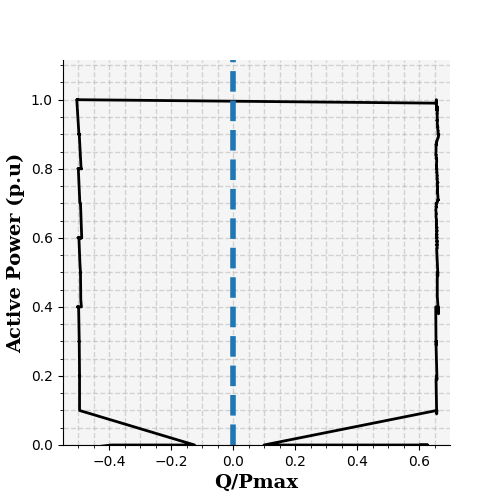

Text(0.5, 0, 'Q/Pmax')

In [11]:
p=[data['P/P'][i] for i in reversed(range(360))]
p=p+data['P/P'][360:].tolist()
q=[data['Q/P'][i] for i in reversed(range(360))]
q=q+data['Q/P'][360:].tolist()
fig, ax = plt.subplots(figsize=(5,5))
l1 = ax.plot(q,f,label='V(Q)',linewidth=2,c='k')
# l2 = ax.plot(data['Q/Pmax'],0.85*np.ones(len(data['V(p.u)'])),linewidth=2,c=l1[0].get_color())
ax.axvline(linewidth=4, ls='--')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('whitesmoke')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel('Active Power (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)


<IPython.core.display.Javascript object>


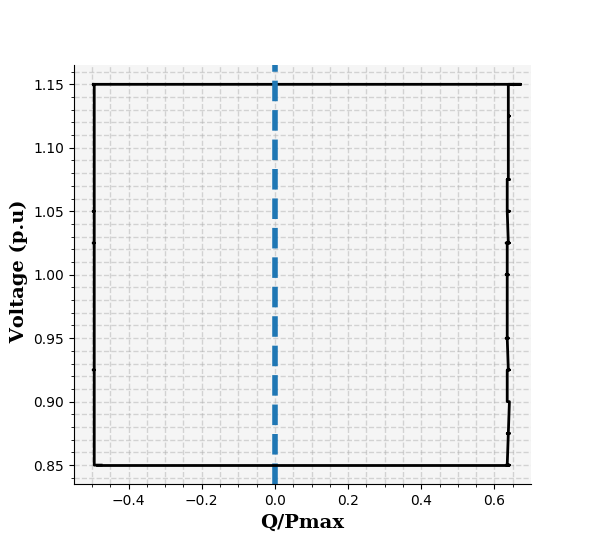

In [51]:
fig, ax = plt.subplots(figsize=(5,5))
l1 = ax.plot(data['Q/Pmax'],data['V(p.u)'],label='V(Q)',linewidth=2,c='k')
ax.axvline(linewidth=4, ls='--')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('whitesmoke')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
# ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel(' Voltage (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)
ax.axhline(y=0.85,xmin=0.05,xmax=0.95,linewidth=2, ls='-',c='k')

In [1]:
from plot_maplot_v1 import *
import numpy as np
%matplotlib notebook
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)
(time,m,s,en)=get_traces(data)
def custom_plot(x,ys):
    lines=[]
    axes=[]
    fig, ax = plt.subplots(figsize=(10,5))
    axes.append(ax)
    
    for arg in ys:
        if arg["ax2"]==True:
            ax2 = ax.twinx()
            axes.append(ax2)
            break
    i=1
    j=1
    for arg in ys:
        if arg["ax2"]==False:
            l,=ax.plot(x,arg["tr"],label="Y1,"+str(i),color=np.random.rand(3,),linewidth=2)
            lines.append(l)
            i+=1
        else:
            l,=ax2.plot(x,arg["tr"],label="Y2,"+str(j),color=np.random.rand(3,),linewidth=2)
            lines.append(l)
            j+=1

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_facecolor('whitesmoke')
    ax.grid(which='both',ls='--',lw=1,alpha=0.5)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(interval_multiples=True))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=20,integer=True))
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xlabel('X Label goes here',fontdict=font)
    ax.set_ylabel('Y1 label goes here',fontdict=font)
    
#     ax.set_title('Active Power Control',fontdict=font,x=0.5,y=1.05)
    if j > 1:
        ax2.spines["top"].set_visible(False)
        ax2.yaxis.set_major_locator(MaxNLocator(nbins=20,integer=True))
        ax2.yaxis.set_minor_locator(AutoMinorLocator())
        ax2.set_ylabel('Y2 label goes here',fontdict=font)

    labs = [l.get_label() for l in lines]
    leg = axes[0].legend(lines,labs,bbox_to_anchor=(0.5, 1.1),loc='upper center',ncol=len(lines),prop=legend_font,
                   fancybox=True, shadow=True)
    try:
        m = min([min(calc_minmax(y["tr"])) for y in args if y["ax2"]==True])
        M = max([max(calc_minmax(y["tr"])) for y in args if y["ax2"]==True])
        ax2.set_ylim(m,M)
    except:pass

    try:
        m = min([min(calc_minmax(y["tr"])) for y in args if y["ax2"]==False])
        M = max([max(calc_minmax(y["tr"])) for y in args if y["ax2"]==False])
        ax.set_ylim(m,M)
    except:pass
    fig.autofmt_xdate()
    return (fig,fig.axes,lines,leg)


Please enter the path of you csv file:/home/spiros/Data/Kazakstan/mkat_24_01.csv


<IPython.core.display.Javascript object>


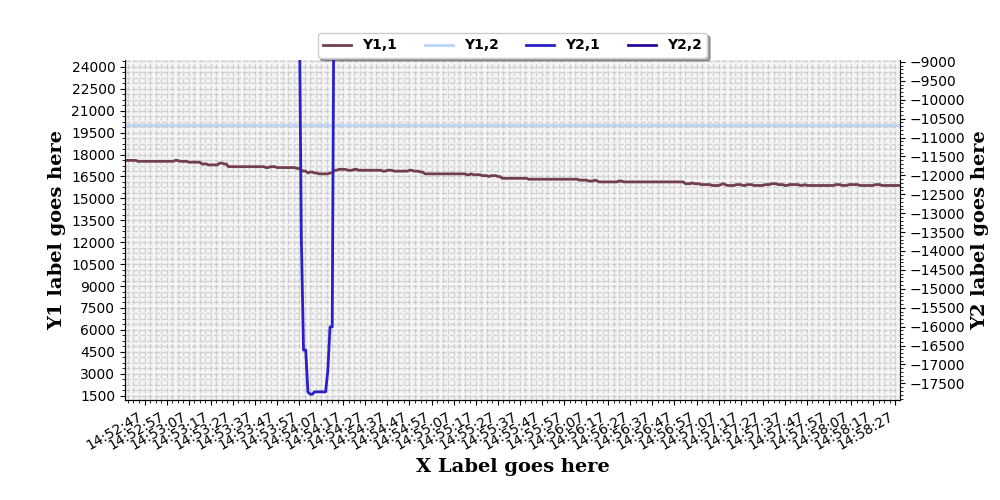

In [2]:
%matplotlib notebook
y1={"tr":m['P'].iloc[:,0],"ax2":False}
y2={"tr":s['P'].iloc[:,0],"ax2":False}
y3={"tr":m['Q'].iloc[:,0],"ax2":True}
y4={"tr":s['Q'].iloc[:,0],"ax2":True}
fig,axes,lines,leg=custom_plot(time,[y1,y2,y3,y4])

In [3]:
ax.get_yticklabels()[0].get_rotation()

NameError: name 'ax' is not defined

In [11]:
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter,LinearLocator,MaxNLocator,MultipleLocator
loc = mdates.SecondLocator(interval = 10)
loc.MAXTICKS=20000
fig.axes[0].xaxis.set_major_locator(loc)

In [26]:
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)


In [27]:
fig.canvas.draw()

Please enter the path of you csv file:/home/spiros/Data/Sakaka/sakaka_test2_parsed.csv


<IPython.core.display.Javascript object>


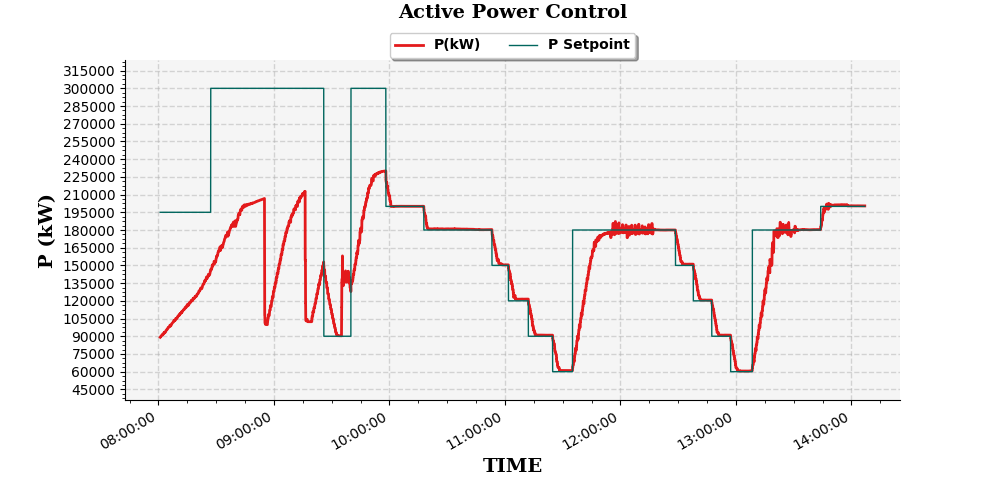

In [24]:
from plot_maplot_v1 import *
from recourses import *
import base64
import io
import tkinter as tk
from tkinter import colorchooser,filedialog,simpledialog,messagebox,ttk,PhotoImage
from PIL import Image, ImageTk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg,NavigationToolbar2Tk
from matplotlib.lines import Line2D
from matplotlib.text import Text
import matplotlib as mpl
import sys
import re
import numpy as np
import matplotlib.dates as mdates

%matplotlib notebook
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)
(time,m,s,en)=get_traces(data)

choose_plot=tk.Tk()

def ask_trace(title,sets):
    
    def destroyer():
        input_trace.destroy()

    def get_strace():
        global strace
        strace=vs.get()

    input_trace=tk.Toplevel(choose_plot)
    input_trace.geometry("+{}+{}".format(choose_plot.winfo_x(),choose_plot.winfo_y()))
    input_trace.resizable(width=False, height=False)
    input_trace.withdraw()
    input_trace.protocol("WM_DELETE_WINDOW")
    input_trace.title(title)

    j=0
    vs=tk.IntVar()
    for s in sets.columns:
        sb=tk.Radiobutton(input_trace,text=s,variable=vs,value=j+1)
        sb.grid(row=j+1,column=0,columnspan=2)
        sb.config(command= get_strace)
        j=j+1

    tk.Label(input_trace,text="Please select trace for "+title).grid(row=0,column=0,columnspan=2)
    quit_trace = tk.Button(input_trace,text='Apply',command=destroyer)
    quit_trace.grid(row=j+1,columnspan=2)
    input_trace.deiconify()
    input_trace.grab_set()
    input_trace.wait_window(input_trace)

if len(s['P'].columns)>1:
    ask_trace('P Setpoint',s['P'])
else:
    strace=1
try:
    fig,axes,lines,leg= plot_P(time,m['P'].iloc[:,0],s['P'].iloc[:,strace-1],en['P'].iloc[:,0])
except TypeError:
    messagebox.showwarning("Warning","Select a trace",parent=choose_plot)
        
choose_plot.mainloop()

In [26]:
list(s['P'].columns)

['apc:PSP0', 'apc:PSP0_eff']

In [27]:
import seaborn as sb

In [28]:
sb.set()

In [29]:
fig.canvas.draw()